In [1]:
# import  libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(font_scale=1.1)

df = pd.read_csv("data/titanic.csv")

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
# basic data info
print("Shape: ", df.shape)
print('\n')
print('Unique value:\n',df.nunique())
print('\n')
print(df.info())
print('\n')
df.describe().T

Shape:  (891, 12)


Unique value:
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5),

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

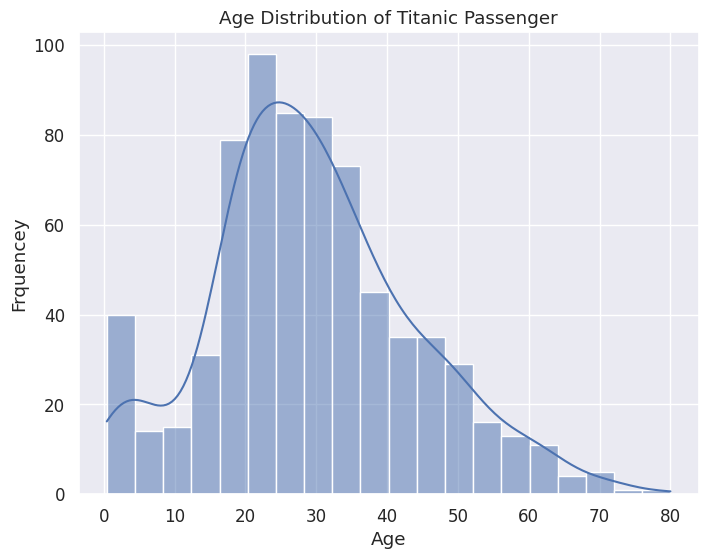

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(df["Age"], kde = True, bins = 20)
plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()
# We will use Median as the feature values are right skewed

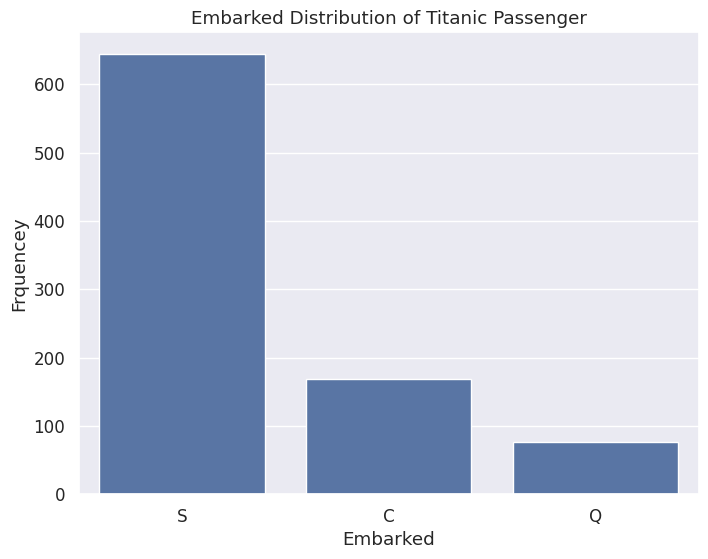

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked")
plt.ylabel("Frquencey")
plt.show()
# We will use Mode

In [6]:
# handle age missing value
age_median = df['Age'].median()

df['Age'] = df['Age'].fillna(age_median)

# handle Embarked missing value
embarked_mode = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(embarked_mode)

# drop Cabin, because more than 70% value are null
# df = df.drop(columns='Cabin')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# encoding categorical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


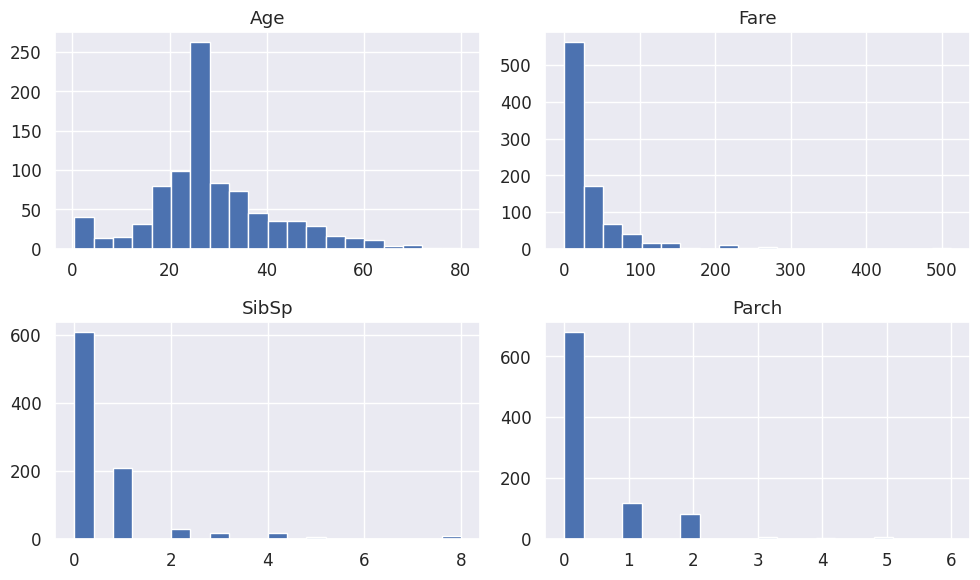

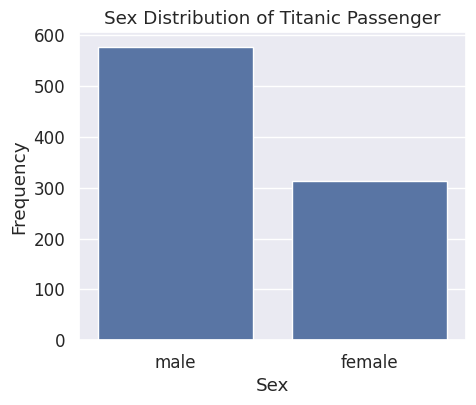

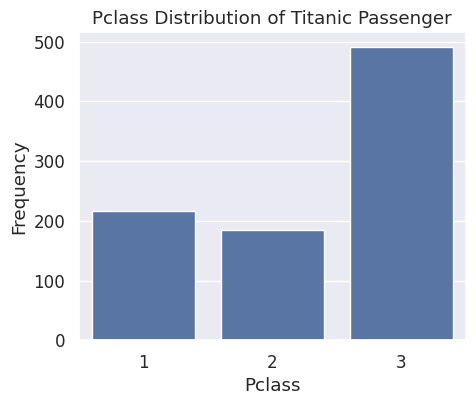

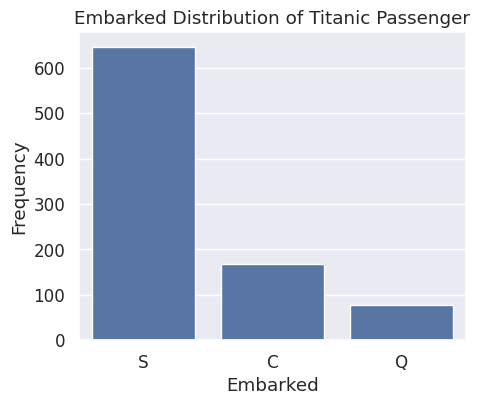

In [8]:
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

cat_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_cols:
  plt.figure(figsize=(5,4))
  sns.countplot(data=df, x=c)
  plt.title(c+" Distribution of Titanic Passenger")
  plt.xlabel(c)
  plt.ylabel("Frequency")
  plt.show()

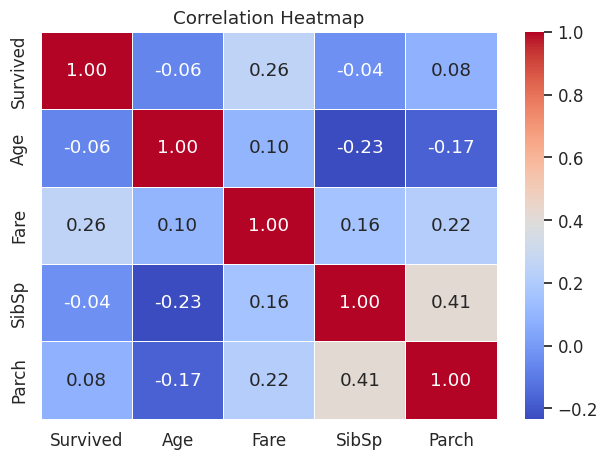

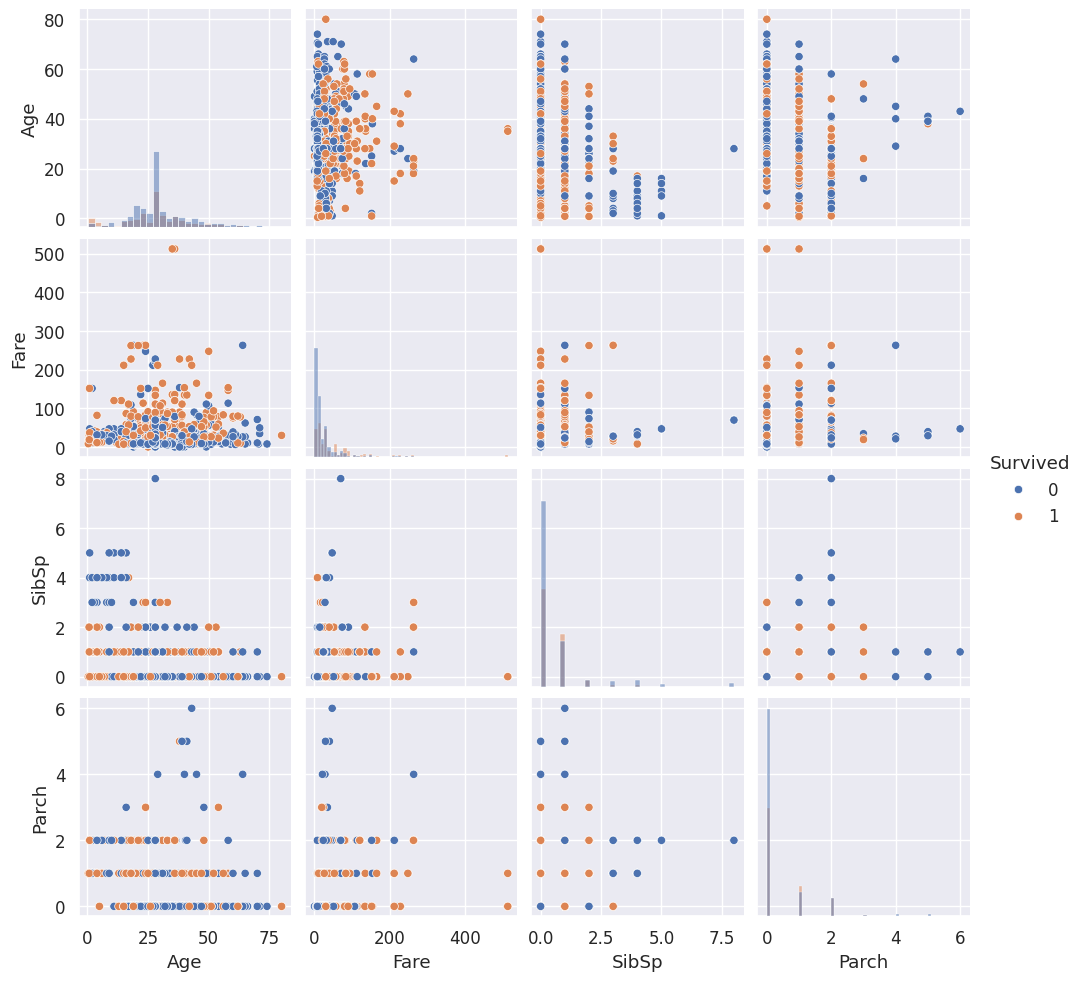

In [ ]:
num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
## generate correlation heatmap and pairplot

corr_matrix = df[num_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

sns.pairplot(df[num_for_corr], hue="Survived", diag_kind="hist")
plt.show()


Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


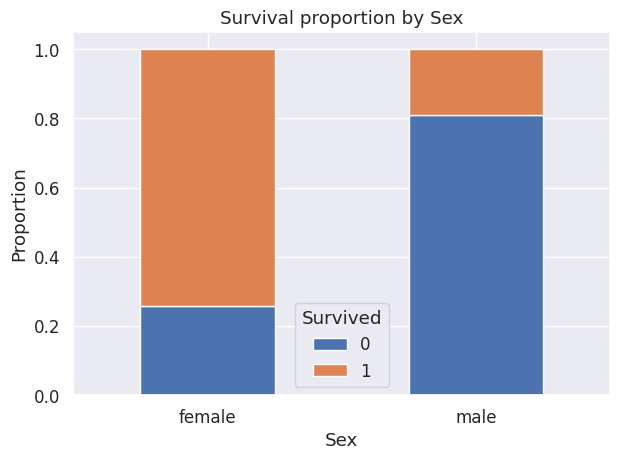


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


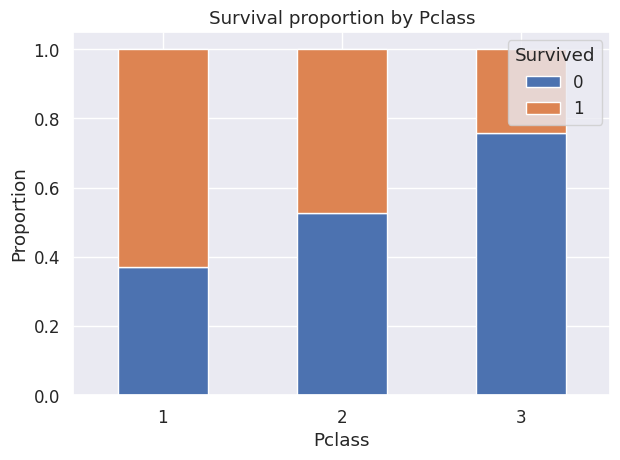


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


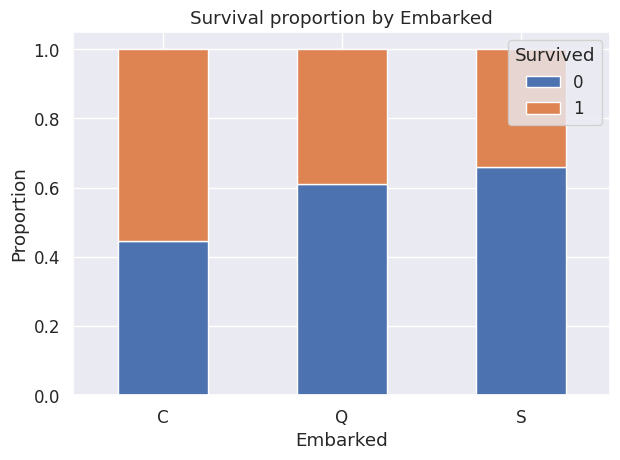

In [10]:
cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
print("Missing values before:")
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df = df.drop(columns='Cabin')

# Fill Age (Complete this code block)
age_median = df['Age'].median() # values are right skewed, so choose median
df['Age'] = df['Age'].fillna(age_median)

# Fill Embarked (Complete this code block)
embarked_mode = df['Embarked'].mode()[0] # most of the Embarked are 'S', use mode here
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
df_enc = df.copy()

cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

encoded_df = pd.get_dummies(df_enc[cat_features], columns = cat_features, dtype=int)

df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 13)


,Survived,Age,Fare,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,0,1,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,1,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,1,0,1,0,0,0,1,1,0,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,1


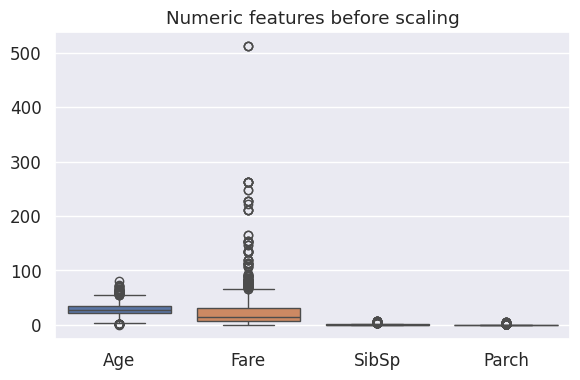

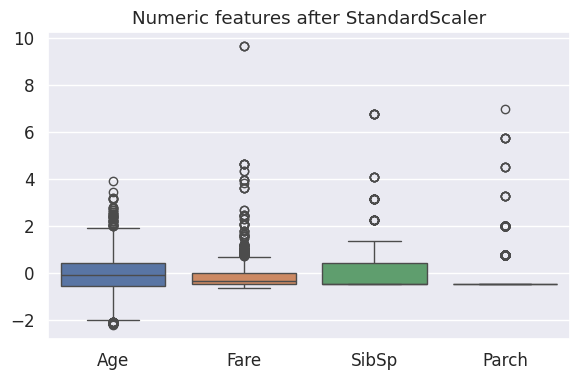

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler
scaler_sd = StandardScaler()
X_std = scaler_sd.fit_transform(df_model[score_cols])
df_scaled = pd.DataFrame(X_std, columns = df_model[score_cols].columns, index = df_model[score_cols].index)

# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

In [14]:
df_model[score_cols] = df_scaled

print('Total missing value: ', df_model.isna().sum().sum())
df_model.describe().T


Total missing value:  0


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Age,891.0,2.272780e-16,1.000562,-2.224156,-0.565736,-0.104637,0.433312,3.891554
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
SibSp,891.0,4.386066e-17,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
Parch,891.0,5.382900e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
Sex_female,891.0,3.524130e-01,0.477990,0.000000,0.000000,0.000000,1.000000,1.000000
Sex_male,891.0,6.475870e-01,0.477990,0.000000,0.000000,1.000000,1.000000,1.000000
Embarked_C,891.0,1.885522e-01,0.391372,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,891.0,8.641975e-02,0.281141,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_S,891.0,7.250281e-01,0.446751,0.000000,0.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numeric pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("ohe",OneHotEncoder(drop="first"))
])

# Combine both
preprocess = ColumnTransformer([
    ("num",num_pipeline,numeric_cols),
    ("cat",cat_pipeline,cat_cols)
])

# Full pipeline with a simple model
clf = Pipeline([
   ("prep",preprocess),
   ("model",LogisticRegression(max_iter=1000))
])


In [16]:
# Train-test split using original df (not already encoded)
X = df.drop(columns=[target_col])
y = df[target_col]

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

# Fit the full pipeline
clf.fit(X_train_pipe, y_train_pipe)

# Predict and evaluate
from sklearn.metrics import accuracy_score

y_pred_pipe = clf.predict(X_test_pipe)
acc=accuracy_score(y_test_pipe,y_pred_pipe)
print("Logistic Regression with preprocessing pipeline: ", acc)

Logistic Regression with preprocessing pipeline:  0.7982062780269058
